In [1]:
from utils.analyze import load_data
from utils.analysis import detrend2D, wiener, sensor_function, sample_shape
from utils.plot import plot
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy.ndimage.filters import gaussian_filter
%matplotlib inline

In [2]:
x, y, z, T, t, settings = load_data("height01_1", range(1,21))
x = x[0]
y = y[0]
settings = settings[0]

In [3]:
def cat1d(x):
    x_flat = [xi.flatten() for xi in x]
    return np.concatenate(x_flat)

In [4]:
#from matplotlib.dates import HourLocator, DateFormatter
#dt = np.array([[datetime.datetime.fromtimestamp(tii) for tii in ti] for ti in t])
#plt.plot(cat1d(dt), cat1d(T))
#plt.gca().xaxis.set_major_locator(HourLocator())
#plt.gca().xaxis.set_major_formatter(DateFormatter("%H:%M"))
#plt.gcf().autofmt_xdate()

In [5]:
sensor = z[9][0]
background1 = z[10][0]
background2 = z[16][0]
background3 = z[18][0]
noise = detrend2D(background2 - background3)
signal = sensor - background1

(<matplotlib.figure.Figure at 0x7f3a5bc5b358>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3a892729e8>)

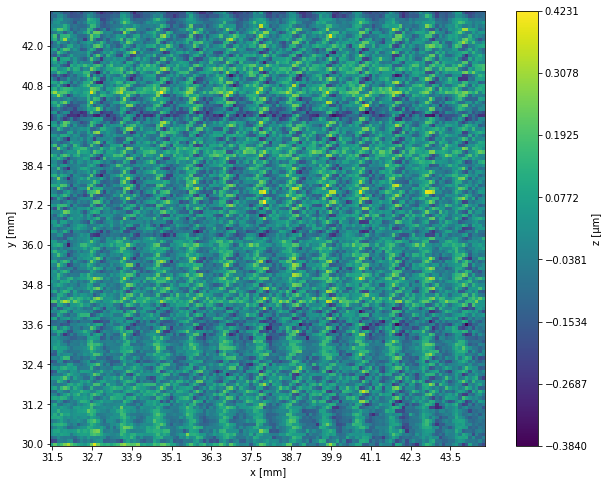

In [6]:
#plot(x, y, sensor)
#plot(x, y, background1)
#plot(x, y, signal)
plot(x, y, noise)

In [20]:
sensor_diameter = 2.57
sensor_sigma = 0.5

coords = [(35.5, 33.3), (41.6, 34), (41.0, 39.8), (35.0, 39.1)]
sample_height = -53
sample_amplitude = 1
sample_wl = (50, 50)
sample_angle = 0
sample_sigma = 1

stepsize = settings['extent'][0][2]
sample = sample_shape(coords, x, y, sample_height, sample_amplitude, sample_wl, sample_angle, sample_sigma)
kernel = sensor_function(sensor_diameter / stepsize, sensor_sigma)

(<matplotlib.figure.Figure at 0x7f3a535a5f28>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3a5358b390>)

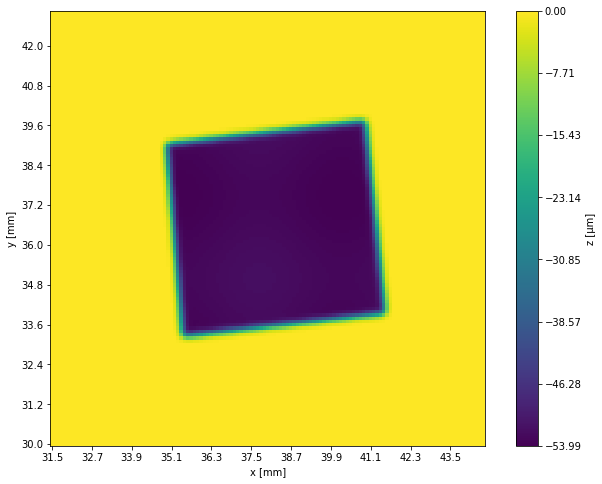

In [21]:
#plt.imshow(kernel)
plot(x, y, sample)

(<matplotlib.figure.Figure at 0x7f3a534fbf60>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3a534dbcf8>)

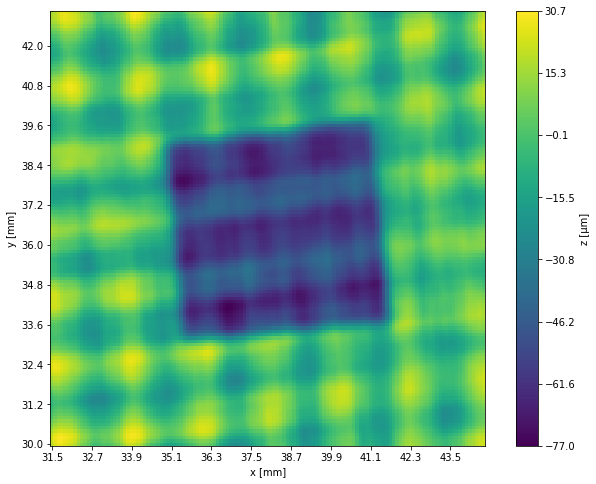

In [22]:
z_reconstructed = wiener(signal, kernel, noise, sample)
plot(x, y, z_reconstructed)